In [14]:
# Данные тут
# https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k/data


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [16]:
temp=pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv")
display(temp.head(3))
temp.info()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62760 entries, 0 to 62759
Data columns (total 4 columns):
Date                            62760 non-null object
Fremont Bridge Total            62750 non-null float64
Fremont Bridge East Sidewalk    62750 non-null float64
Fremont Bridge West Sidewalk    62750 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB


In [17]:
df=pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)

In [18]:
display(df.head(5))
display(df.tail(5))
df.info()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-30 19:00:00,20.0,10.0,10.0
2019-11-30 20:00:00,14.0,8.0,6.0
2019-11-30 21:00:00,13.0,6.0,7.0
2019-11-30 22:00:00,19.0,10.0,9.0
2019-11-30 23:00:00,12.0,6.0,6.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62760 entries, 2012-10-03 00:00:00 to 2019-11-30 23:00:00
Data columns (total 3 columns):
Fremont Bridge Total            62750 non-null float64
Fremont Bridge East Sidewalk    62750 non-null float64
Fremont Bridge West Sidewalk    62750 non-null float64
dtypes: float64(3)
memory usage: 1.9 MB


In [19]:
(df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk'] != df['Fremont Bridge Total']).sum()

10

In [20]:
df[df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk'] != df['Fremont Bridge Total']]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-06-14 09:00:00,NaN,NaN,NaN
2013-06-14 10:00:00,NaN,NaN,NaN
2014-03-09 02:00:00,NaN,NaN,NaN
2015-03-08 02:00:00,NaN,NaN,NaN
2015-04-21 11:00:00,NaN,NaN,NaN
2015-04-21 12:00:00,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN
2017-03-12 02:00:00,NaN,NaN,NaN
2018-03-11 02:00:00,NaN,NaN,NaN


In [21]:
dfi = df.interpolate(method='piecewise_polynomial', axis=0);

In [26]:
(dfi['Fremont Bridge East Sidewalk'] + dfi['Fremont Bridge West Sidewalk'] != dfi['Fremont Bridge Total']).sum()

0

In [10]:
# точно?

In [11]:
# все правильно?

In [12]:
# точно?

In [13]:
# все правильно?

In [14]:
# точно?

In [29]:
dfi.loc['2013-06-14 09:00:00']

Fremont Bridge Total            183.666667
Fremont Bridge East Sidewalk    116.000000
Fremont Bridge West Sidewalk     67.666667
Name: 2013-06-14 09:00:00, dtype: float64

In [40]:
# возвращаемся к df
df=dfi

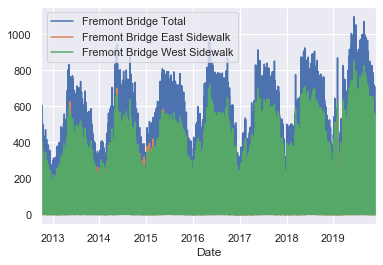

In [42]:
sns.set()
df.plot();

(376944, 380568)

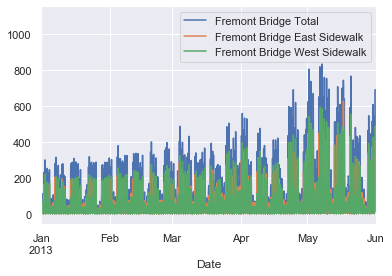

In [38]:
_=df.plot()
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,6,1))

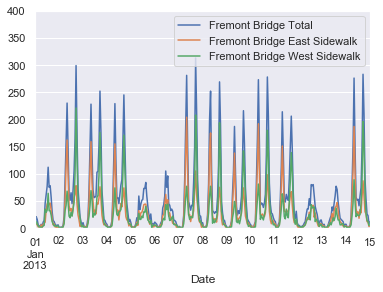

In [39]:
_=df.plot()
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,1,15))
_.set_ylim(0,400);

In [20]:
weekly=df.resample('W').sum()
weekly.head(3)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,14292.0,7297.0,6995.0
2012-10-14,16795.0,8679.0,8116.0
2012-10-21,15509.0,7946.0,7563.0


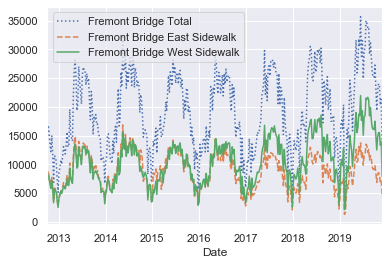

In [21]:
weekly.plot(style=[':','--','-']);

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0


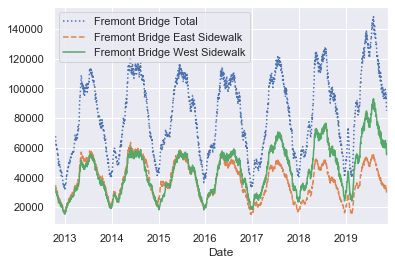

In [22]:
# сглаживание с переносом результата в середину выборки
daily=df.resample('D').sum()
display(daily.head(3))
daily_mean=daily.rolling(30,center=True).sum()
daily_mean.plot(style=[':','--','-']);

In [23]:
# сглаживание с переносом результата в середину выборки
display(daily_mean.head(30))
display(daily_mean.tail(30))

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
2012-10-08,NaN,NaN,NaN
2012-10-09,NaN,NaN,NaN
2012-10-10,NaN,NaN,NaN
2012-10-11,NaN,NaN,NaN


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01,96083.0,33460.0,62623.0
2019-11-02,94325.0,33007.0,61318.0
2019-11-03,92321.0,32412.0,59909.0
2019-11-04,94714.0,33075.0,61639.0
2019-11-05,97729.0,33961.0,63768.0
2019-11-06,99106.0,34424.0,64682.0
2019-11-07,99409.0,34500.0,64909.0
2019-11-08,98106.0,34018.0,64088.0
2019-11-09,94723.0,32996.0,61727.0


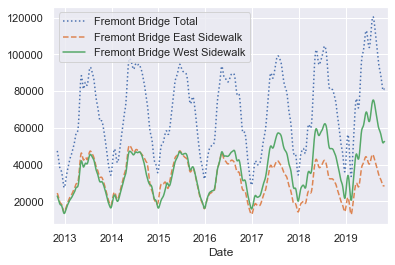

In [24]:
daily_gauss=daily.rolling(60,center=True,win_type='gaussian').sum(std=10)
daily_gauss.plot(style=[':','--','-']);

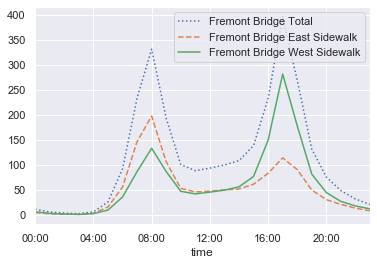

In [35]:
day_time=df.groupby(df.index.time).mean()
hourly_ticks=day_time.index.values[::4]
g=day_time.plot(style=[':','--','-']);
g.set_xticks(hourly_ticks);

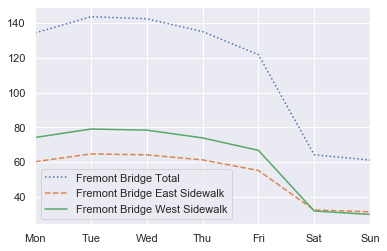

In [26]:
week_day=df.groupby(df.index.dayofweek).mean()
#  внимание смотреть тут  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week_day.index=week_name

g=week_day.plot(style=[':','--','-'])
g.set_xticks(np.arange(len(week_name)));# тут нужно объяснить, что нумерация идет с 1, поэтому танец с бубном!
g.set_xticklabels(week_name);

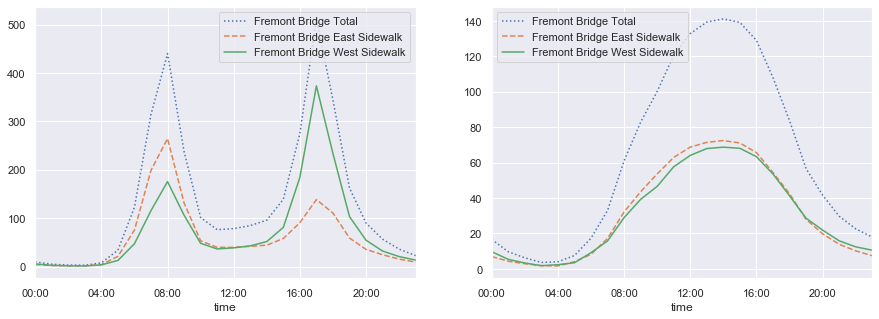

In [27]:
day_type=np.where(df.index.dayofweek<5,'Workday','Weekend')
by_day=df.groupby([day_type,df.index.time]).mean()

fig , ax = plt.subplots(1,2,figsize=(15,5))

by_day.loc['Workday'].plot(ax=ax[0],xticks=hourly_ticks,style=[':','--','-']);
by_day.loc['Weekend'].plot(ax=ax[1],xticks=hourly_ticks,style=[':','--','-']);

In [28]:
day_month=df.index.month
by_month_day=df.groupby([day_month,day_type,df.index.time]).mean()
display(by_month_day.head())
by_month_day.index.names

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                        
1    Weekend 00:00:00             10.000000                      4.283333   
             01:00:00              5.983333                      2.783333   
             02:00:00              3.600000                      1.766667   
             03:00:00              1.950000                      0.950000   
             04:00:00              2.366667                      1.066667   

                       Fremont Bridge West Sidewalk  
Date                                                 
1    Weekend 00:00:00                      5.716667  
             01:00:00                      3.200000  
             02:00:00                      1.833333  
             03:00:00                      1.000000  
             04:00:00                      1.300000

FrozenList(['Date', None, None])

In [29]:
by_month_day.index.names=['month','day','time']
by_month_day.head()

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
month day     time                                                           
1     Weekend 00:00:00             10.000000                      4.283333   
              01:00:00              5.983333                      2.783333   
              02:00:00              3.600000                      1.766667   
              03:00:00              1.950000                      0.950000   
              04:00:00              2.366667                      1.066667   

                        Fremont Bridge West Sidewalk  
month day     time                                    
1     Weekend 00:00:00                      5.716667  
              01:00:00                      3.200000  
              02:00:00                      1.833333  
              03:00:00                      1.000000  
              04:00:00                      1.300000

In [30]:
df_1=by_month_day.reset_index()
df_1.head()

,month,day,time,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,1,Weekend,00:00:00,10.000000,4.283333,5.716667
1,1,Weekend,01:00:00,5.983333,2.783333,3.200000
2,1,Weekend,02:00:00,3.600000,1.766667,1.833333
3,1,Weekend,03:00:00,1.950000,0.950000,1.000000
4,1,Weekend,04:00:00,2.366667,1.066667,1.300000


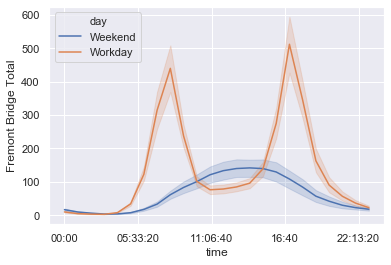

In [31]:
sns.lineplot(x='time', y='Fremont Bridge Total', hue='day', data= df_1);

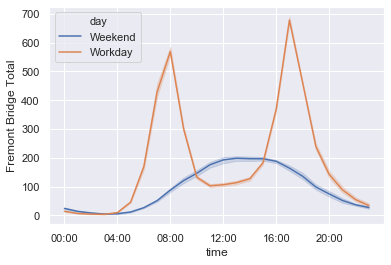

In [32]:
df_2=df_1[df_1.month.isin([5,6,7,8])]
sns.lineplot( x='time', y='Fremont Bridge Total', hue='day', data=df_2)
plt.xticks(hourly_ticks);

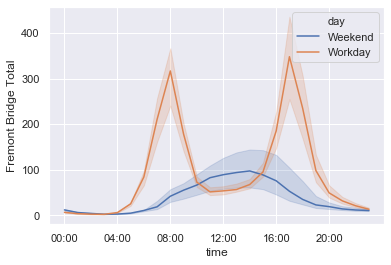

In [41]:
df_2=df_1[df_1.month.isin([11,12,1,2,3])]
sns.lineplot( x='time', y='Fremont Bridge Total', hue='day', data=df_2, estimator=np.median)
plt.xticks(hourly_ticks);